#### Chrystalla Havadjia, Maria Barrera Valdez, Dara Hashemi
## Investigating likeliness of coupon used for Resutrants under 20  -  550 Project 

In [1]:
clear

In [2]:
#libraries 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'./data_in-vehicle-coupon-recommendation.csv')
df.head(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1


### ---------------------------------------------------------------------------------------------------------------------------
# Data Exploration
#### Get the general idea of the data and what pre-processing steps will be necessary
- General data information
- Summary of numerical attributes
- Understanding Features for Feature Selection

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

### Check for missing values 
 - Column with only one value add no added information
     - toCoupon_GEQ5min
 - car has large number of missing vlaue and inconsistency in inputs with no added infomration

In [5]:
for column in df:
    print(column, ": ", df[column].isnull().values.any())

destination :  False
passanger :  False
weather :  False
temperature :  False
time :  False
coupon :  False
expiration :  False
gender :  False
age :  False
maritalStatus :  False
has_children :  False
education :  False
occupation :  False
income :  False
car :  True
Bar :  True
CoffeeHouse :  True
CarryAway :  True
RestaurantLessThan20 :  True
Restaurant20To50 :  True
toCoupon_GEQ5min :  False
toCoupon_GEQ15min :  False
toCoupon_GEQ25min :  False
direction_same :  False
direction_opp :  False
Y :  False


In [6]:
for column in df:
    print(df[column].value_counts()) 
    print("______________________")

No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64
______________________
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64
______________________
Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64
______________________
80    6528
55    3840
30    2316
Name: temperature, dtype: int64
______________________
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64
______________________
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64
______________________
1d    7091
2h    5593
Name: expiration, dtype: int64
______________________
Female    6511
Male      6173
Name: gender, dtype: int64
______________________
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093

### ---------------------------------------------------------------------------------------------------------------------------
# Pre-processing 
- Focus on analyizing only one type of coupon - Restaurant(<20). All other coupons will be droped

- Drop car and GEO5 columes as it has one attribute and will not add information to the Regression

- Fill missing values for Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50


In [7]:
#copy dataframe to start pre-processing
df_coupons = df.copy()

In [8]:
#drop instances where coupon was not resturant 
df_coupons.drop(df_coupons[df_coupons['coupon'] != 'Restaurant(<20)'].index, inplace = True)

In [9]:
#check if other coupons where dropped
print(np.unique(df_coupons['coupon']))

['Restaurant(<20)']


In [10]:
#delete columns that do not offer information or 
del df_coupons['car']   #too many missing values as identified in exploration

df_coupons["toCoupon_GEQ5min"].value_counts() # column only has one value no added information

1    2786
Name: toCoupon_GEQ5min, dtype: int64

In [11]:
#identify columns with missing vlaues to fill and number of missing values
df_coupons.isnull().sum()

destination              0
passanger                0
weather                  0
temperature              0
time                     0
coupon                   0
expiration               0
gender                   0
age                      0
maritalStatus            0
has_children             0
education                0
occupation               0
income                   0
Bar                     23
CoffeeHouse             47
CarryAway               34
RestaurantLessThan20    27
Restaurant20To50        43
toCoupon_GEQ5min         0
toCoupon_GEQ15min        0
toCoupon_GEQ25min        0
direction_same           0
direction_opp            0
Y                        0
dtype: int64

### Fill missing values using the mode

In [12]:
df_coupons['RestaurantLessThan20'] = df['RestaurantLessThan20'].fillna(df['RestaurantLessThan20'].mode()[0])
df_coupons['Bar'] = df['Bar'].fillna(df['Bar'].mode()[0])
df_coupons['CoffeeHouse'] = df['CoffeeHouse'].fillna(df['CoffeeHouse'].mode()[0])
df_coupons['Restaurant20To50'] = df['Restaurant20To50'].fillna(df['Restaurant20To50'].mode()[0])
df_coupons['CarryAway'] = df['CarryAway'].fillna(df['CarryAway'].mode()[0])

In [13]:
#check that no missing vlaues 
df_coupons.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

### Delete redundant columns such as one of the paired dummy variable columns of direcition

In [14]:
del df_coupons['direction_opp']     #offers no addisitonal information - same as direct_same
del df_coupons['toCoupon_GEQ5min']  #only one value - no additional information
del df_coupons['coupon']            #no further information added since single coupon is selected

### --------------------------------------------------------------------------------------------------------------------------- 
## Vizualization of data 

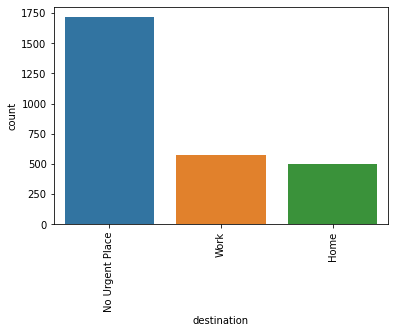

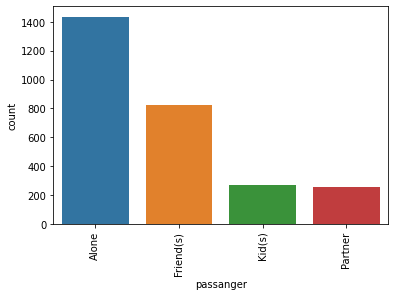

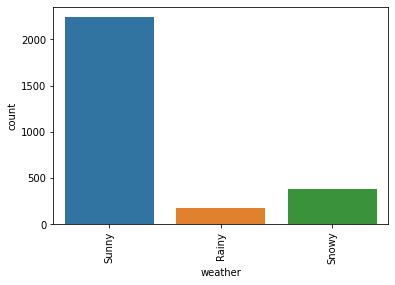

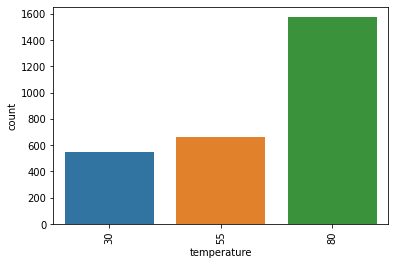

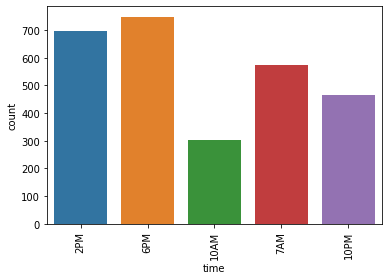

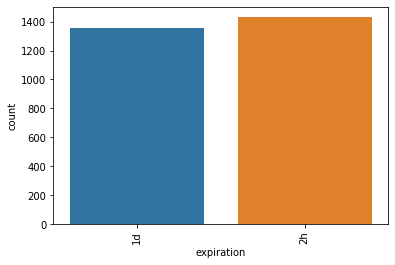

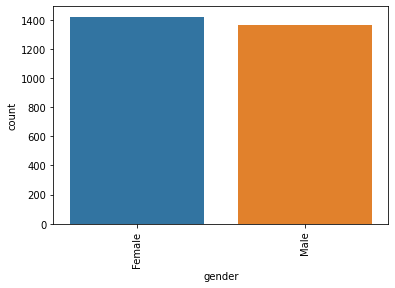

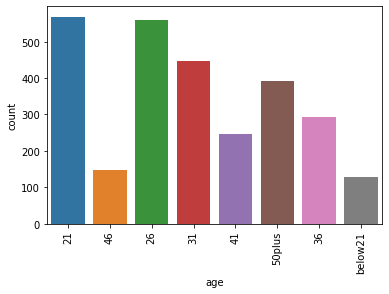

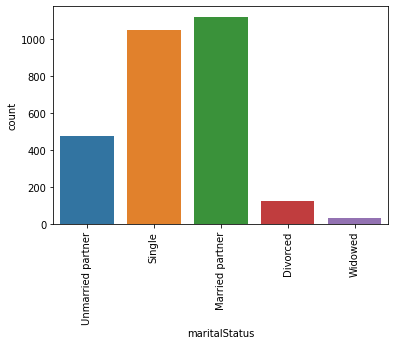

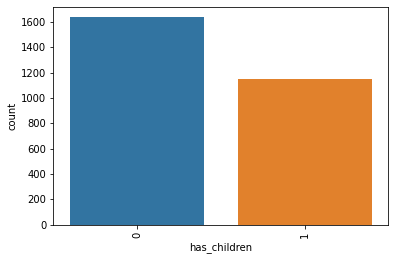

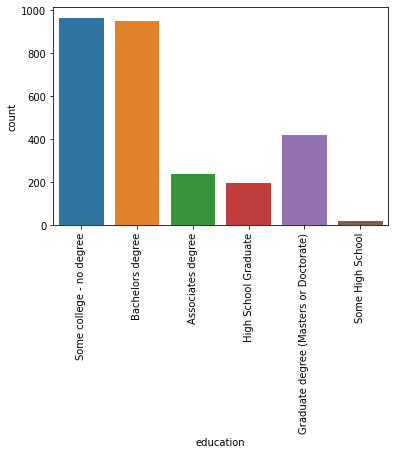

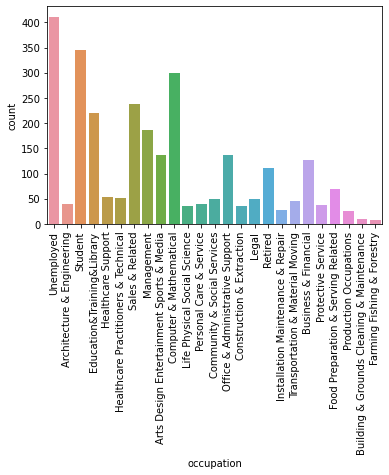

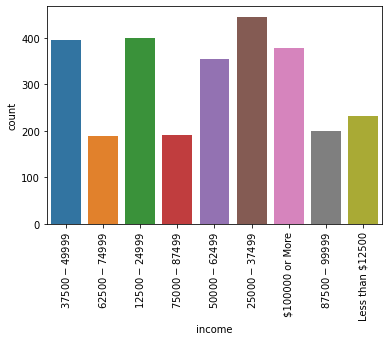

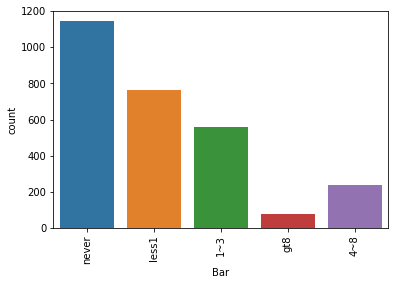

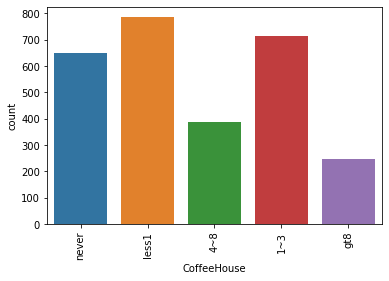

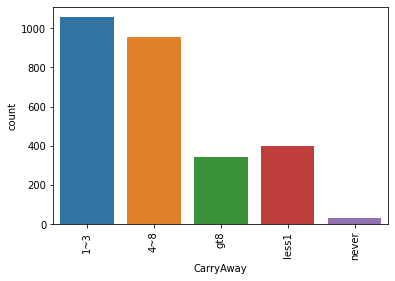

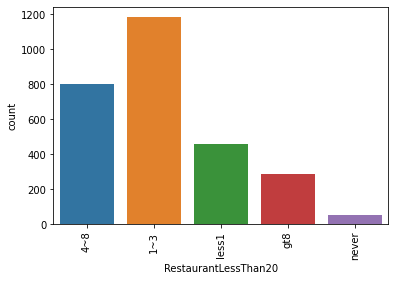

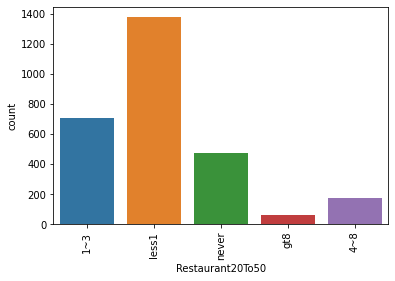

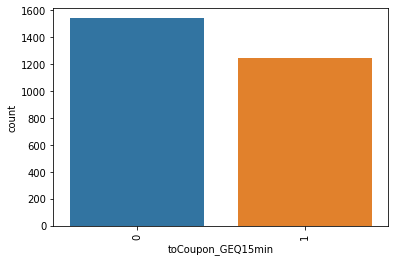

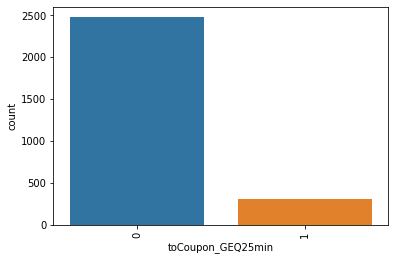

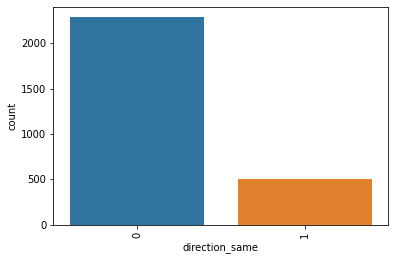

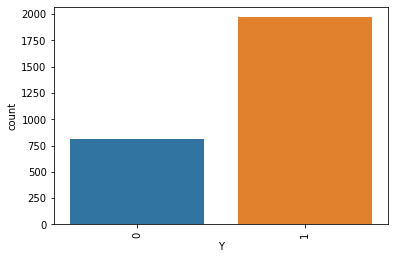

In [15]:
for column in df_coupons:
    sns.countplot(x=column, data=df_coupons)
    plt.xticks(rotation=90)
    plt.show()

Text(0.5, 0, 'Number of instances')

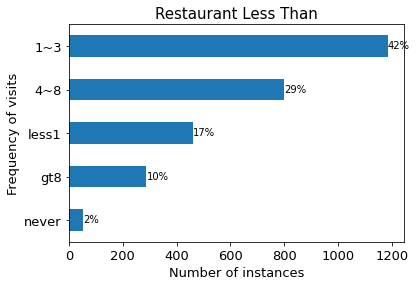

In [16]:
y = "RestaurantLessThan20"
ax = df_coupons[y].value_counts().sort_values().plot(kind="barh",label='index',fontsize=13)
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100))+'%', 
     fontsize=10, color='black')
ax.set_title('Restaurant Less Than',
             fontsize=15, color='black')
ax.set_ylabel('Frequency of visits',fontsize=13)
ax.set_xlabel('Number of instances',fontsize=13)

### --------------------------------------------------------------------------------------------------------------------------- 
## Feature Engineering 
### Determine which features are most important 
- Chi-Squared Test of Independence in R was used to find independant variables 
- Use correlation for feature selection

In [17]:
#Feature engineering chosen using chi square
#delete features that are not strongly correlated to where the customer accepted of declined the coupon
del df_coupons['maritalStatus']
del df_coupons['has_children']
del df_coupons['education']
del df_coupons['occupation']
del df_coupons['CarryAway']
del df_coupons['Bar']
del df_coupons['toCoupon_GEQ15min']
del df_coupons['income']
del df_coupons['age']

In [18]:
df_coupons.head(3)

,destination,passanger,weather,temperature,time,expiration,gender,CoffeeHouse,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ25min,direction_same,Y
0,No Urgent Place,Alone,Sunny,55,2PM,1d,Female,never,4~8,1~3,0,0,1
5,No Urgent Place,Friend(s),Sunny,80,6PM,2h,Female,never,4~8,1~3,0,0,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,2h,Female,never,4~8,1~3,0,0,1


### Map remaing features from categorical to numerical dummy variables for easier analysis

In [19]:
df_coupons["RestaurantLessThan20"].value_counts() 

1~3      1184
4~8       800
less1     460
gt8       288
never      54
Name: RestaurantLessThan20, dtype: int64

In [20]:
mapping = {'No Urgent Place': 0, 'Work': 1, 'Home':2 , 'Alone': 0, 'Friend(s)': 1, 'Kid(s)':2, 'Partner':3,
          'Sunny': 0, 'Snowy': 1, 'Rainy':2,'6PM': 18, '2PM': 14, '7AM':7 , '10PM': 22, '10AM' : 10}
df_coupons = df_coupons.replace({'destination': mapping, 'passanger': mapping,'weather': mapping,'time': mapping})

mapping = {'6PM': 18, '2PM': 14, '7AM':7 , '10PM': 22, '10AM' : 10, '1d': 24 , '2h':2, 'Female':0,'Male':1,
          'never':0,'less1':1,'1~3':3,'4~8':8, 'gt8':9,'50plus':50, 'below21':20}

df_coupons = df_coupons.replace({'time': mapping, 'expiration': mapping, 'gender':mapping, 
                               'RestaurantLessThan20':mapping, 'Restaurant20To50':mapping, 
                               'CoffeeHouse':mapping, 'age':mapping, 'Bar':mapping, 'CarryAway':mapping})


### Investigate correlations between each variable and price
 - Drop features with correlation less than +/- 0.18

In [21]:
corr_matrix = df_coupons.corr()
corr_matrix['Y'].sort_values(ascending = False)

Y                       1.000000
expiration              0.266024
temperature             0.181211
passanger               0.111463
RestaurantLessThan20    0.049759
gender                  0.023349
Restaurant20To50        0.018488
time                    0.016102
CoffeeHouse            -0.003477
direction_same         -0.075862
destination            -0.225543
weather                -0.269678
toCoupon_GEQ25min      -0.296467
Name: Y, dtype: float64

In [22]:
def drop_uncorr_feat(corr_matrix,df,dep_colum,r): 

    """ Takes correlation Matrix as input
        
         Returns uncorrelated featurs
    """
    
    #drop uncorrelated columns 
    col_names_corr = corr_matrix[dep_colum].index

    i=0
    drop_col = []

    #deremine columns to be droped
    for row in corr_matrix[dep_colum]:
        if  (-r < row < r):
            drop_col.append(col_names_corr[i])
        i+=1

    return drop_col
    
    
drop_col = drop_uncorr_feat(corr_matrix,df,'Y',0.18)

for i in range(len(drop_col)):
     del df_coupons[drop_col[i]]

Text(0.5, 1.0, 'Correlaiton Matrix')

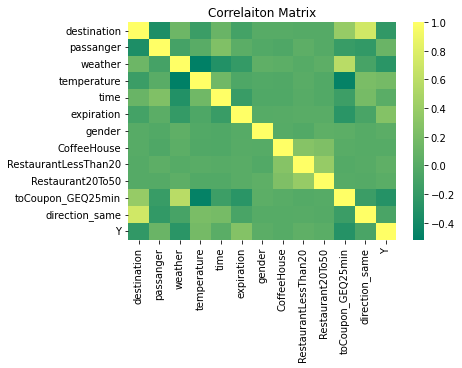

In [23]:
sns.heatmap(corr_matrix,cmap="summer")
plt.title('Correlaiton Matrix')

In [24]:
# Most correlated features with coupon acceptaqnce
df_coupons.columns

Index(['destination', 'weather', 'temperature', 'expiration',
       'toCoupon_GEQ25min', 'Y'],
      dtype='object')

### --------------------------------------------------------------------------------------------------------------------------- 
## Analysis - Logistic Regression

### Split, train data 

In [25]:
y = df_coupons['Y'].copy()#dependant variable
X = df_coupons.copy() #independant variables
del X['Y']

In [26]:
#Split dataset into train and test using 
random_state = 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= random_state, shuffle=True)

## Fit Model -  LogisticRegresion

In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def get_cross_val(model, X, y):
    """
      cross validation: split data into kfolds to validate model
    
      Outputs: computes accuracy for each fold 
    """
    
    kf = KFold(shuffle=True, n_splits=3, random_state= random_state)
    
    acc = cross_val_score(model, X, y, 
                             scoring="accuracy", cv=kf)
    f1 = cross_val_score(model, X, y, 
                             scoring="f1", cv=kf)
    acc = acc.mean()
    print('Cross Validation Mean Accuracy: {0:.2f}'.format(acc * 100.0))
    f1 = f1.mean()
    print('Cross Validation Mean F1-score: {0:.2f}'.format(f1 * 100.0))

--- Evaluation ---
 LogisticRegression(C=1)
Cross Validation Mean Accuracy: 74.28
Cross Validation Mean F1-score: 83.54

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.34      0.44       241
           1       0.77      0.91      0.83       595

    accuracy                           0.74       836
   macro avg       0.69      0.63      0.64       836
weighted avg       0.72      0.74      0.72       836

Confusion Matrix:
[[ 83 158]
 [ 56 539]]


Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

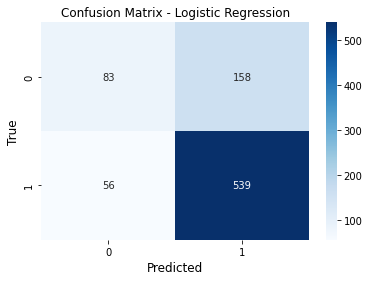

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#train model
log_reg = LogisticRegression(C=1).fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

    # Evaluate on test data
print("--- Evaluation ---\n", log_reg)
get_cross_val(log_reg,X_test, y_test)
print()
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
#print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title('Confusion Matrix - Logistic Regression')

### Test for overfitting 
- fit train data and test for accuracy, if accuracy is alot higher for training data then test data then there is a risk of overfitting

In [29]:
#train model
log_reg = LogisticRegression(C=1).fit(X_train, y_train)
y_pred = log_reg.predict(X_train)

    # Evaluate on test data
print("--- Evaluation ---\n", log_reg)
get_cross_val(log_reg,X_train, y_train)
print()
print('Classification Report:')
print(classification_report(y_train, y_pred))


--- Evaluation ---
 LogisticRegression(C=1)
Cross Validation Mean Accuracy: 75.79
Cross Validation Mean F1-score: 84.65

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.31      0.43       575
           1       0.77      0.95      0.85      1375

    accuracy                           0.76      1950
   macro avg       0.74      0.63      0.64      1950
weighted avg       0.75      0.76      0.72      1950



  ## Baseline model test for comparison - Zero Rate Classifier
  - Model should predit better than baseline model
  - Models should have better than 71% accuracy


In [30]:
df_coupons['Y'].value_counts()

1    1970
0     816
Name: Y, dtype: int64

In [31]:
#Change variable names for vizualizaiton purpuses
df_coupons['Y'] = df_coupons['Y'].replace([0],'Denied')
df_coupons['Y'] = df_coupons['Y'].replace([1],'Accepted')

Text(0.5, 1.0, 'Baseline Model: Coupons Accepted/Denied Percentage')

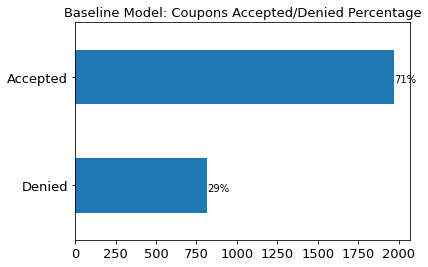

In [32]:
y = "Y"
ax = df_coupons[y].value_counts().sort_values().plot(kind="barh",label='index',fontsize=13)
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100))+'%', 
     fontsize=10, color='black')
ax.set_title('Baseline Model: Coupons Accepted/Denied Percentage', fontsize=13, color='black')
